In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
data=pd.read_csv('../input/apple-stock-price/Apple_Price.csv')

In [9]:
data.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-05-12 00:00:00+00:00,90.34,92.78,89.47,92.72,76314690,21.095605,21.665378,20.892448,21.651367,305258760,0.0,1.0
1,AAPL,2016-05-13 00:00:00+00:00,90.52,91.67,90.00,90.00,44392765,21.137637,21.406178,21.016210,21.016210,177571060,0.0,1.0
2,AAPL,2016-05-16 00:00:00+00:00,93.88,94.39,91.65,92.39,61259756,21.922242,22.041334,21.401507,21.574307,245039024,0.0,1.0
3,AAPL,2016-05-17 00:00:00+00:00,93.49,94.70,93.01,94.55,46916939,21.831172,22.113724,21.719086,22.078696,187667756,0.0,1.0
4,AAPL,2016-05-18 00:00:00+00:00,94.56,95.21,93.89,94.16,42062391,22.081032,22.232815,21.924578,21.987626,168249564,0.0,1.0


In [10]:
data.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2021-05-04 00:00:00+00:00,127.85,131.4899,126.700,131.19,137564718,127.634352,131.268112,126.486291,130.968718,137564718,0.00,1.0
1253,AAPL,2021-05-05 00:00:00+00:00,128.10,130.4500,127.970,129.20,84000900,127.883930,130.229966,127.754149,128.982075,84000900,0.00,1.0
1254,AAPL,2021-05-06 00:00:00+00:00,129.74,129.7500,127.130,127.89,78128334,129.521164,129.531147,126.915566,127.674284,78128334,0.00,1.0
1255,AAPL,2021-05-07 00:00:00+00:00,130.21,131.2582,129.475,130.85,78973273,130.210000,131.258200,129.475000,130.850000,78973273,0.22,1.0
1256,AAPL,2021-05-10 00:00:00+00:00,126.85,129.5400,126.810,129.41,88071229,126.850000,129.540000,126.810000,129.410000,88071229,0.00,1.0


In [11]:
d1=data['close']

<AxesSubplot:>

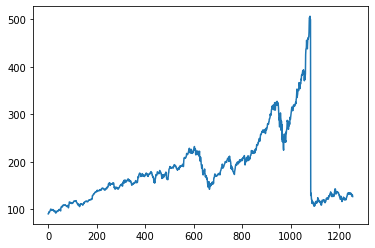

In [12]:
d1.plot.line()

In [13]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
d1=sc.fit_transform(np.array(d1).reshape(-1,1))

In [14]:
train_size=int(len(d1)*0.7)
test_size=len(d1)-train_size
train_size,test_size

(879, 378)

In [16]:
train_data=d1[0:train_size,:]
test_data=d1[train_size:,:]

In [17]:
train_data.shape,test_data.shape

((879, 1), (378, 1))

In [18]:
def create_dataset(data,timestep=1):
  x_data=[]
  y_data=[]
  for i in range (len(data)-timestep-1):
    x_data.append(data[i:i+timestep,0])
    y_data.append(data[i+timestep,0])
  return np.array(x_data),np.array(y_data)

In [19]:
timestep=100
x_train,y_train=create_dataset(train_data,timestep)
x_test,y_test=create_dataset(test_data,timestep)

In [20]:
x_train.shape,y_train.shape

((778, 100), (778,))

In [21]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [23]:
x_train.shape,x_test.shape

((778, 100, 1), (277, 100, 1))

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [25]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64)

Epoch 1/100
13/13 [==============================] - 9s 325ms/step - loss: 0.0276 - val_loss: 0.0435
Epoch 2/100
13/13 [==============================] - 3s 222ms/step - loss: 0.0030 - val_loss: 0.0308
Epoch 3/100
13/13 [==============================] - 3s 218ms/step - loss: 0.0021 - val_loss: 0.0272
Epoch 4/100
13/13 [==============================] - 3s 223ms/step - loss: 8.2762e-04 - val_loss: 0.0236
Epoch 5/100
13/13 [==============================] - 3s 219ms/step - loss: 4.5900e-04 - val_loss: 0.0246
Epoch 6/100
13/13 [==============================] - 3s 217ms/step - loss: 4.0823e-04 - val_loss: 0.0228
Epoch 7/100
13/13 [==============================] - 3s 220ms/step - loss: 4.3668e-04 - val_loss: 0.0226
Epoch 8/100
13/13 [==============================] - 3s 227ms/step - loss: 3.7791e-04 - val_loss: 0.0224
Epoch 9/100
13/13 [==============================] - 3s 218ms/step - loss: 4.1666e-04 - val_loss: 0.0221
Epoch 10/100
13/13 [==============================] - 3s 223ms/step

In [28]:
train_pred=model.predict(x_train)
test_pred=model.predict(x_test)

In [29]:
train_pred=sc.inverse_transform(train_pred)
test_pred=sc.inverse_transform(test_pred)

In [30]:
Y_train=y_train.reshape(-1,1)
Y_train=sc.inverse_transform(Y_train)
Y_test=y_test.reshape(-1,1)
Y_test=sc.inverse_transform(Y_test)

In [31]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(train_pred,Y_train))

4.116449147993606

In [32]:
math.sqrt(mean_squared_error(test_pred,Y_test))

37.79134685344248

In [33]:
d1=sc.inverse_transform(d1)
step=100
train_predictplot=np.empty_like(d1)
train_predictplot[:,:]=np.nan
train_predictplot[step:len(train_pred)+step,:]=train_pred

test_predictplot=np.empty_like(d1)
test_predictplot[:,:]=np.nan
test_predictplot[(2*step)+len(train_pred)+1:len(d1)-1,:]=test_pred


In [34]:
train_predictplot.shape,d1.shape,test_predictplot.shape

((1257, 1), (1257, 1), (1257, 1))

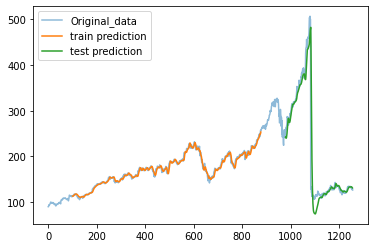

In [35]:
plt.plot(d1,label='Original_data',alpha=0.5)
plt.plot(train_predictplot,label='train prediction')
plt.plot(test_predictplot,label='test prediction')
plt.legend()

In [36]:
len(test_data)

378

In [37]:
x_input=test_data[len(test_data)-100:].reshape(1,-1)
x_input.shape

(1, 100)

In [38]:
input=list(x_input)
input=input[0].tolist()

In [39]:
input

[0.0902946482260974,
 0.0901262778111846,
 0.09226698737221883,
 0.08734816596512324,
 0.0911365003006614,
 0.09991581479254358,
 0.09770294648226097,
 0.10013229104028859,
 0.11148526758869509,
 0.10710763680096214,
 0.1043415514131088,
 0.10186410102224891,
 0.09397474443776305,
 0.0978232110643415,
 0.08721587492483462,
 0.09760673481659649,
 0.10032471437161755,
 0.09294046903187009,
 0.09250751653638006,
 0.09753457606734811,
 0.09277209861695729,
 0.08851473241130486,
 0.09017438364401681,
 0.10027660853878534,
 0.11191822008418523,
 0.11720986169573056,
 0.12647023451593503,
 0.1270475045099218,
 0.12440168370414911,
 0.11244738424533973,
 0.10010823812387254,
 0.10535177390258565,
 0.10739627179795552,
 0.10487071557426336,
 0.11316897173782314,
 0.11165363800360789,
 0.11201443174984965,
 0.10984966927239925,
 0.10835838845460005,
 0.10773301262778107,
 0.1083102826217679,
 0.10306674684305472,
 0.09741431148526758,
 0.09469633193024657,
 0.09508117859290438,
 0.08577269993986

In [40]:
output=[]
i=0
while(i<30):
  x_input=np.array(input)
  x_input=x_input.reshape(1,-1)
  x_input=x_input.reshape(1,100,1)
  y_output=model.predict(x_input)
  input.extend(y_output[0].tolist())
  input=input[1:]
  output.extend(y_output[0].tolist())
  i=i+1

In [41]:
output=np.array(output)
output.reshape(-1,1)

array([[0.09618726],
       [0.09569787],
       [0.09586468],
       [0.09646939],
       [0.09729516],
       [0.09818928],
       [0.099064  ],
       [0.09987769],
       [0.10061561],
       [0.10127702],
       [0.10186747],
       [0.10239528],
       [0.10286994],
       [0.10330126],
       [0.10369901],
       [0.10407244],
       [0.10442988],
       [0.10477859],
       [0.10512454],
       [0.10547233],
       [0.10582516],
       [0.10618522],
       [0.10655344],
       [0.10693005],
       [0.1073146 ],
       [0.10770617],
       [0.10810357],
       [0.10850547],
       [0.10891055],
       [0.10931756]])

In [42]:
len(d1)

1257

<Figure size 1440x1440 with 0 Axes>

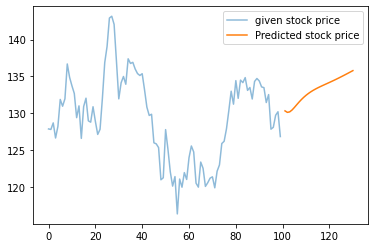

<Figure size 1440x1440 with 0 Axes>

In [45]:
old_data=np.arange(0,100)
new_data=np.arange(101,131)
plt.plot(old_data,d1[1157:],label='given stock price',alpha=0.5)
plt.plot(new_data,sc.inverse_transform(output.reshape(-1,1)),label='Predicted stock price')
plt.legend()
plt.figure(figsize=(20,20))

<Figure size 1440x1440 with 0 Axes>

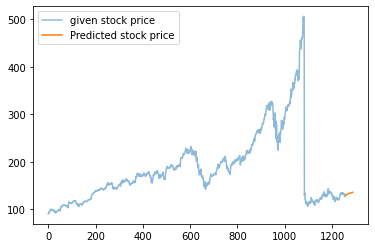

<Figure size 1440x1440 with 0 Axes>

In [47]:
old_data=np.arange(0,1257)
new_data=np.arange(1258,1288)
plt.plot(old_data,d1,label='given stock price',alpha=0.5)
plt.plot(new_data,sc.inverse_transform(output.reshape(-1,1)),label='Predicted stock price')
plt.legend()
plt.figure(figsize=(20,20))